## Simple solutions to the EFE

Here, we want to establish some simple solutions to the EFE.

### Flat minkowski space
$$
ds^2 = - dt^2 + dx^2 + dy^2 + dz^2 = -dt^2 + dr^2 + r^2 \left( d\theta^2 + \sin^2\theta d\varphi^2\right)
$$


The simplest next generalization is to itnroduce some parameters.  For example, let's introduce a time dilation $\alpha$ as well as some other, although only _centrally symmetric_, parameters $\beta,\:\gamma$:

$$
ds^2 = -\alpha dt^2 + \beta dr^2 + \gamma r^2 \left( d\theta^2 + \sin^2\theta d\varphi^2\right)
$$

Let's play around with sympy's diffgeo-module for a while.

In [44]:
from sympy import Function, symbols, sin, cos
from sympy.diffgeom import Manifold, Patch, CoordSystem, Differential, \
    metric_to_Christoffel_1st, metric_to_Christoffel_2nd, \
    metric_to_Riemann_components, metric_to_Ricci_components, \
    TensorProduct as TP, twoform_to_matrix
from sympy.interactive import init_printing
from sympy.matrices import Matrix, eye, diag
init_printing()

In [3]:
g = Function('g')
x, y, z, t = symbols('x y z t')
field = g(t, x, y, z)
dg = Differential(field)
print(dg)

d(g(t, x, y, z))


In [4]:
m = Manifold('m', 4)
p = Patch('p', m)
rect = CoordSystem('rect', p, ['t', 'x', 'y', 'z'])
polar = CoordSystem('polar', p, ['t', 'r', 'θ', 'φ'])
dt, dx, dy, dz = rect.base_oneforms()
t, r, θ, φ = symbols('t r θ φ')
polar.connect_to(rect, [t, r, θ, φ], [t, r * sin(θ) * cos(φ), r * sin(θ) * sin(φ), r * cos(θ)], inverse=False)

In [5]:
dt, dr, dθ, dφ = polar.base_oneforms()
polar.coord_functions()

### Short test
Let's test whether our tiny little coordinate transformation was correct by having a look at the jacobian:

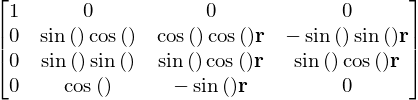

In [6]:
j = polar.jacobian(rect, polar.coord_functions())
j

In [7]:
j.det().simplify()

In [8]:
g = - TP(dt, dt) + TP(dx, dx) + TP(dy, dy) + TP(dz, dz)

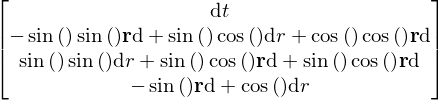

In [9]:
v = Matrix(4, 1, polar.base_oneforms())
metric = j * v
metric.simplify()
metric

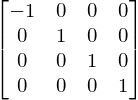

In [10]:
# Building the minkowski metric
eta = diag(-1, eye(3))
eta

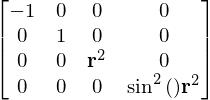

In [11]:
polar_g = (j.transpose() * eta * j).applyfunc(lambda x: x.simplify())
polar_g

In [12]:
point_p = polar.point(symbols('t_0 r_0 θ_0 φ_0'))

In [13]:
# polar_forms_vector = Matrix(4, 1, polar.base_oneforms())
# doesn't work TensorProduct(polar_forms_vector, polar_forms_vector)
metric = sum(polar_g[i,i] * TP(polar.base_oneform(i), polar.base_oneform(i)) for i in range(4))
metric

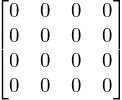

In [14]:
Matrix(4, 4, metric_to_Ricci_components(metric))

Who would've thought **That**? The Ricci Tensor is **Zero** everywhere! and so is every partial derivative of the Metric!! **Coincidence? I think not**.

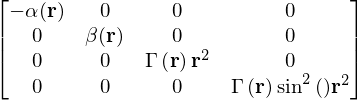

In [15]:
α, β, γ = symbols('alpha beta gamma')
r = polar.coord_function(1)
mod_metric = polar_g.copy() * diag(α(r), β(r), γ(r), γ(r))
mod_metric

In [16]:
new_metric = sum(mod_metric[i,i] * TP(polar.base_oneform(i), polar.base_oneform(i)) for i in range(4))
new_metric

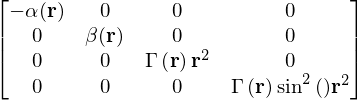

In [43]:
twoform_to_matrix(new_metric)

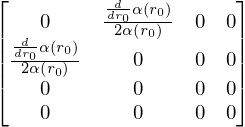

In [17]:
christoffel_2 = metric_to_Christoffel_2nd(new_metric)
christoffel_2 = christoffel_2.applyfunc(lambda x: x.rcall(point_p).doit().simplify())
christoffel_2[0, :, :].tomatrix()

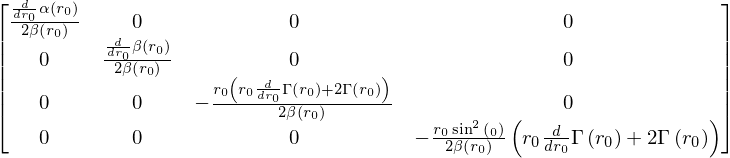

In [18]:
christoffel_2[1, :, :].tomatrix()

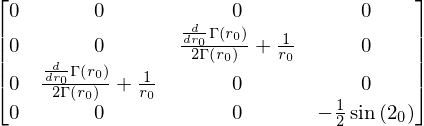

In [19]:
christoffel_2[2, :, :].tomatrix()

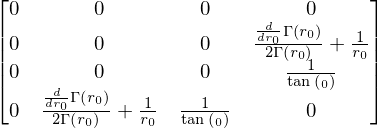

In [20]:
christoffel_2[3, :, :].tomatrix()

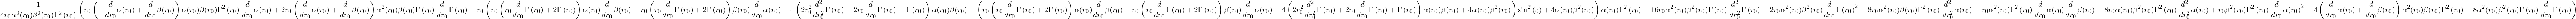

In [54]:
ricci_raw = metric_to_Ricci_components(new_metric).tomatrix()
ricci = ricci_raw.applyfunc(lambda x: x.rcall(point_p).doit().simplify())
R = ricci.trace().simplify()
R

Let's try some senseful simplification: We want $\gamma = 1$

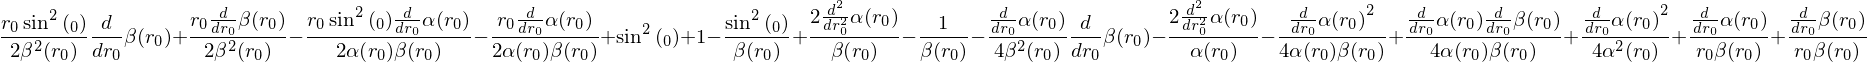

In [22]:
gamma = symbols('gamma')
R_no_gamma = R.replace(gamma('r_0'), 1).doit().simplify()
R_no_gamma

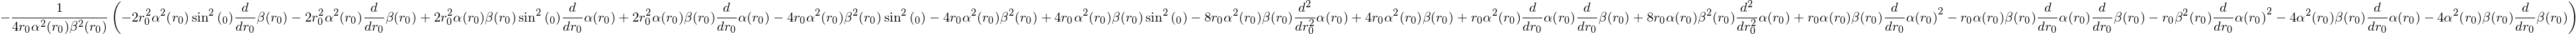

In [23]:
R_no_gamma.factor(deep=True)

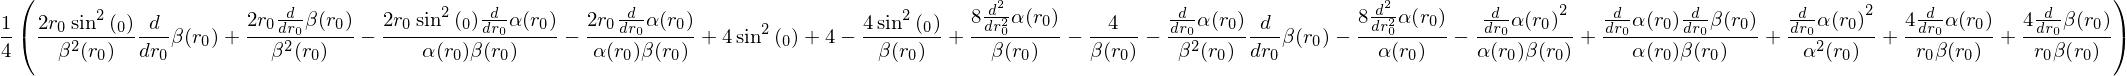

In [24]:
R_no_gamma.as_poly().factor()

In [47]:
einstein = ricci + twoform_to_matrix(new_metric) * R

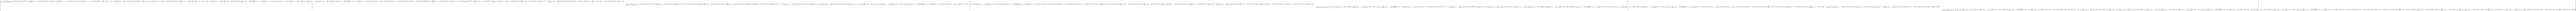

In [49]:
einstein.simplify()
einstein

In [69]:
gamma = symbols('gamma')
ricci_no_gamma = ricci.replace(gamma('r_0'), 1).doit()
R_no_gamma = ricci_no_gamma.trace().simplify()

In [72]:
einstein_no_gamma = ricci_no_gamma + twoform_to_matrix(new_metric) * R_no_gamma

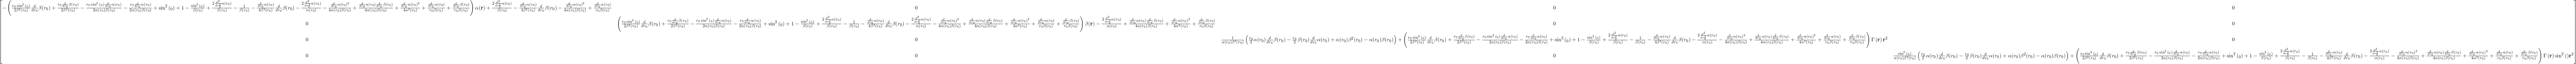

In [73]:
einstein_no_gamma